# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Lists for weather data
city_name = []    
lat = []
lng =[]
max_temp = []
humidity = []
cloudiness = []
wind_speed =[]
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
record = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through city data
for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]['speed'])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        #time.sleep(1.01)
 
        print(f"Processing Record {record} for {city}")
        record = record + 1
    
    except: print(f"Skipping {city}")


print(f"-----------------------------")
print(f"End Data Retrieval")


Beginning Data Retrieval
-----------------------------
Processing Record 1 for bluff
Processing Record 2 for kapaa
Processing Record 3 for puerto ayora
Processing Record 4 for okhotsk
Processing Record 5 for rorvik
Processing Record 6 for qaanaaq
Processing Record 7 for thompson
Processing Record 8 for san ramon
Processing Record 9 for thunder bay
Skipping samusu
Processing Record 10 for punta arenas
Processing Record 11 for busselton
Processing Record 12 for lebu
Skipping kazalinsk
Processing Record 13 for mataura
Processing Record 14 for cape town
Processing Record 15 for fort myers beach
Processing Record 16 for bethel
Processing Record 17 for bredasdorp
Processing Record 18 for klaksvik
Processing Record 19 for hermanus
Processing Record 20 for dakar
Processing Record 21 for albany
Processing Record 22 for makakilo city
Processing Record 23 for namatanai
Processing Record 24 for wangaratta
Processing Record 25 for nijar
Processing Record 26 for ucluelet
Skipping azimur
Processing R

Processing Record 226 for saskylakh
Processing Record 227 for neuquen
Processing Record 228 for narsaq
Processing Record 229 for cherskiy
Processing Record 230 for amuntai
Processing Record 231 for george town
Processing Record 232 for el mante
Processing Record 233 for cubarral
Processing Record 234 for halden
Processing Record 235 for charters towers
Processing Record 236 for kushnarenkovo
Skipping irklievskaya
Processing Record 237 for quirinopolis
Processing Record 238 for codrington
Processing Record 239 for pathein
Processing Record 240 for paamiut
Processing Record 241 for xucheng
Skipping bargal
Processing Record 242 for lyngseidet
Processing Record 243 for sechura
Skipping aflu
Processing Record 244 for pitimbu
Processing Record 245 for dongying
Processing Record 246 for santa rosa
Processing Record 247 for constitucion
Processing Record 248 for hasaki
Skipping tabiauea
Processing Record 249 for kralendijk
Processing Record 250 for de-kastri
Processing Record 251 for tres lago

Processing Record 446 for samarkand
Processing Record 447 for changji
Processing Record 448 for noratus
Processing Record 449 for ivdel
Processing Record 450 for landerneau
Processing Record 451 for yaan
Processing Record 452 for puerto del rosario
Processing Record 453 for panaba
Processing Record 454 for tagusao
Processing Record 455 for bara
Processing Record 456 for pochutla
Processing Record 457 for casas grandes
Processing Record 458 for eureka
Processing Record 459 for hami
Processing Record 460 for mokhsogollokh
Processing Record 461 for sioux lookout
Processing Record 462 for vestmanna
Skipping tumannyy
Processing Record 463 for naantali
Processing Record 464 for coahuayana
Processing Record 465 for san joaquin
Processing Record 466 for sambava
Processing Record 467 for sao paulo de olivenca
Processing Record 468 for asilah
Skipping burkhala
Processing Record 469 for kirakira
Processing Record 470 for majene
Processing Record 471 for chapais
Processing Record 472 for clyde riv

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dataframe
weather_df = pd.DataFrame({
    "City Name": city_name, 
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date

})
# Save data into CSV
weather_df.to_csv("../output/city_data.csv", index = False)

In [5]:
# Display dataframe
weather_df

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,48.99,96,100,3.00,NZ,1601788520
1,Kapaa,22.08,-159.32,82.40,78,40,11.41,US,1601788712
2,Puerto Ayora,-0.74,-90.35,64.00,91,11,1.99,EC,1601788712
3,Okhotsk,59.38,143.30,50.72,60,28,4.25,RU,1601788712
4,Rørvik,64.86,11.24,55.00,71,16,30.91,NO,1601788713
...,...,...,...,...,...,...,...,...,...
544,Rurrenabaque,-14.44,-67.53,71.56,93,47,0.54,BO,1601788853
545,Los Llanos de Aridane,28.66,-17.92,71.60,88,75,13.87,ES,1601788853
546,Ranong,9.97,98.63,86.00,79,20,5.82,TH,1601788853
547,Atherton,53.52,-2.49,51.01,99,100,6.13,GB,1601788854


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.sort_values(by=['Humidity'],ascending=False)

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
380,Shelburne,44.08,-80.20,41.00,100,75,0.94,CA,1601788512
537,Chebsara,59.20,38.84,41.00,100,83,4.47,RU,1601788851
374,Husavik,66.04,-17.34,37.40,100,90,3.36,IS,1601788805
17,Klaksvík,62.23,-6.59,51.80,100,100,6.93,FO,1601788716
420,La Asuncion,11.03,-63.86,68.00,100,25,13.87,VE,1601788819
...,...,...,...,...,...,...,...,...,...
37,Tabas,33.60,56.92,73.40,17,0,2.57,IR,1601788721
342,Mānsa,29.98,75.38,92.98,16,0,0.63,IN,1601788795
359,Broken Hill,-31.95,141.43,93.20,14,40,23.04,AU,1601788800
126,Rāwatsār,29.28,74.38,92.52,13,0,3.00,IN,1601788742


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

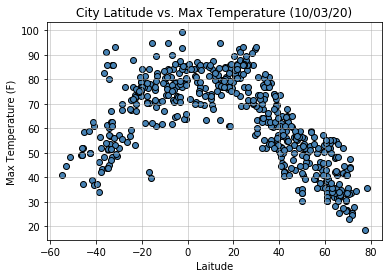

In [11]:
# Create Latitude vs. Temperature Plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Display properties
plt.title("City Latitude vs. Max Temperature (10/03/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output/city-latitude-vs-max-temp.png")

## Latitude vs. Humidity Plot

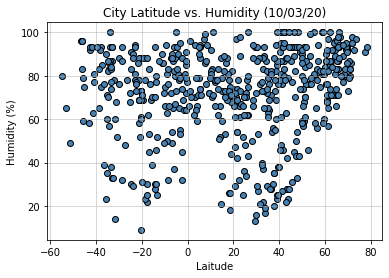

In [12]:
# Create Latitude vs. Humidity Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Display properties
plt.title("City Latitude vs. Humidity (10/03/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output/city-latitude-vs-humidity.png")

## Latitude vs. Cloudiness Plot

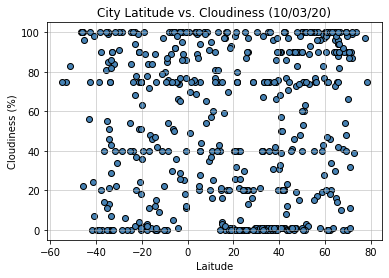

In [13]:
# Create Latitude vs. Cloudiness Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Display properties
plt.title("City Latitude vs. Cloudiness (10/03/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output/city-latitude-vs-cloudiness.png")

## Latitude vs. Wind Speed Plot

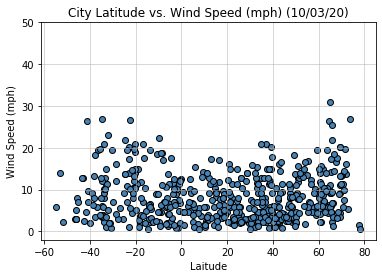

In [14]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Display properties
plt.title("City Latitude vs. Wind Speed (mph) (10/03/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,50)
plt.grid(linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output/city-latitudel-vs-wind-speed.png")

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    return line_eq

# Function for linear regression annotation
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=14,color="red")

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


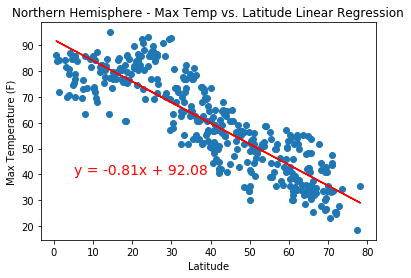

In [26]:
# Defined functions
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 5, 40)

# Display properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("../output/nor-hem-max-temp-vs-lat-linear-reg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.67


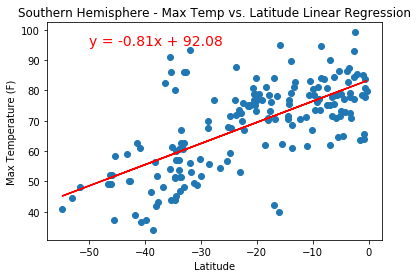

In [29]:
# Defined functions
linear_reg(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
annotate(equation, -50, 95)

# Display properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("../output/so-hem-max-temp-vs-lat-linear-reg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.25


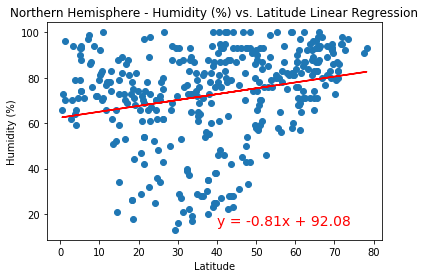

In [30]:
# Defined functions
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 40, 15)

# Display properties
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output/nor-hem-humidity-vs-lat-linear-reg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.06


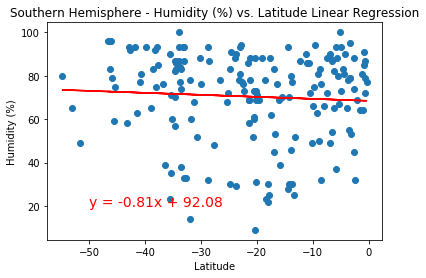

In [32]:
# Defined functions
linear_reg(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -50, 20)

# Display properties
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output/so-hem-humidity-vs-lat-linear-reg.png.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.18


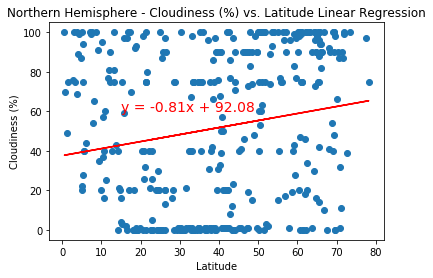

In [34]:
# Defined functions
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 15, 60)

# Display properties
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output/nor-hem-cloudiness-vs-lat-linear-reg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.03


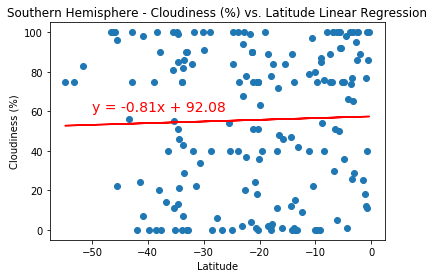

In [36]:
# Defined functions
linear_reg(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -50, 60)

# Display properties
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output/so-hem-cloudiness-vs-lat-linear-reg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.26


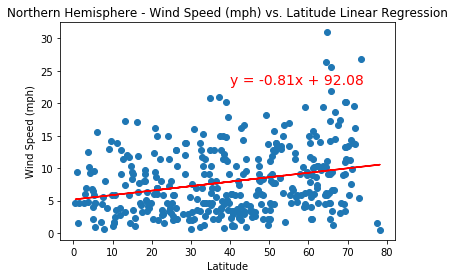

In [39]:
# Defined functions
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 40, 23)

# Display properties
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output/nor-hem-wind-speed-vs-lat-linear-reg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.07


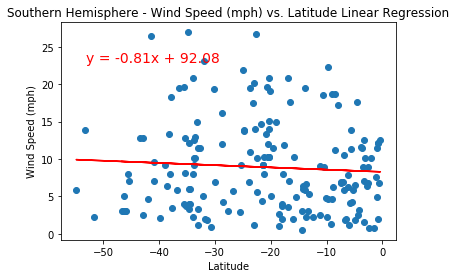

In [42]:
# Defined functions
linear_reg(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -53, 23)

# Display properties
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output/so-hem-wind-speed-vs-lat-linear-reg.png")